<a href="https://colab.research.google.com/github/Omweqa101/Wine-quality-prediction/blob/main/Wine_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

# KNN
from sklearn.neighbors import KNeighborsClassifier

#DIcision Tree
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from re import M

#Random Forest
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# KNN
from sklearn.neighbors import KNeighborsClassifier

## Read CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
redwine = '/content/drive/MyDrive/Wine_CSV/winequality-red.csv'
whitewine = '/content/drive/MyDrive/Wine_CSV/winequalityN.csv'
wine = pd.concat(
   map(pd.read_csv, [whitewine, redwine]), ignore_index=True)

In [ ]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
8092,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
8093,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
8094,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Drop nan and Encoding

In [ ]:
# Change type white=1, red=2
wine[['type']] = wine[['type']].apply(lambda x:x.map({"white":1,"red":2}))
# Score morethan 6 is good, lessthan 6 is bad
wine['quality'] = np.where(wine['quality'] > 6, 1, 0)
wine['quality'].value_counts()

0    6602
1    1494
Name: quality, dtype: int64

In [ ]:
wine['quality'].value_counts().sum()

8096

In [ ]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [ ]:
# check nan value
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# drop nan value
wine = wine.dropna()

In [ ]:
wine.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


## Explore Data

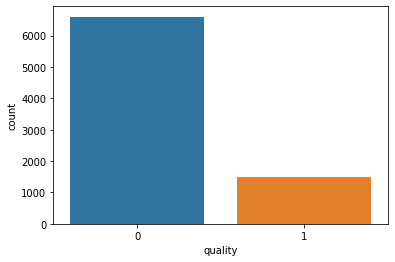

In [ ]:
#Check quality distribution
sns.countplot(x="quality", data=wine)

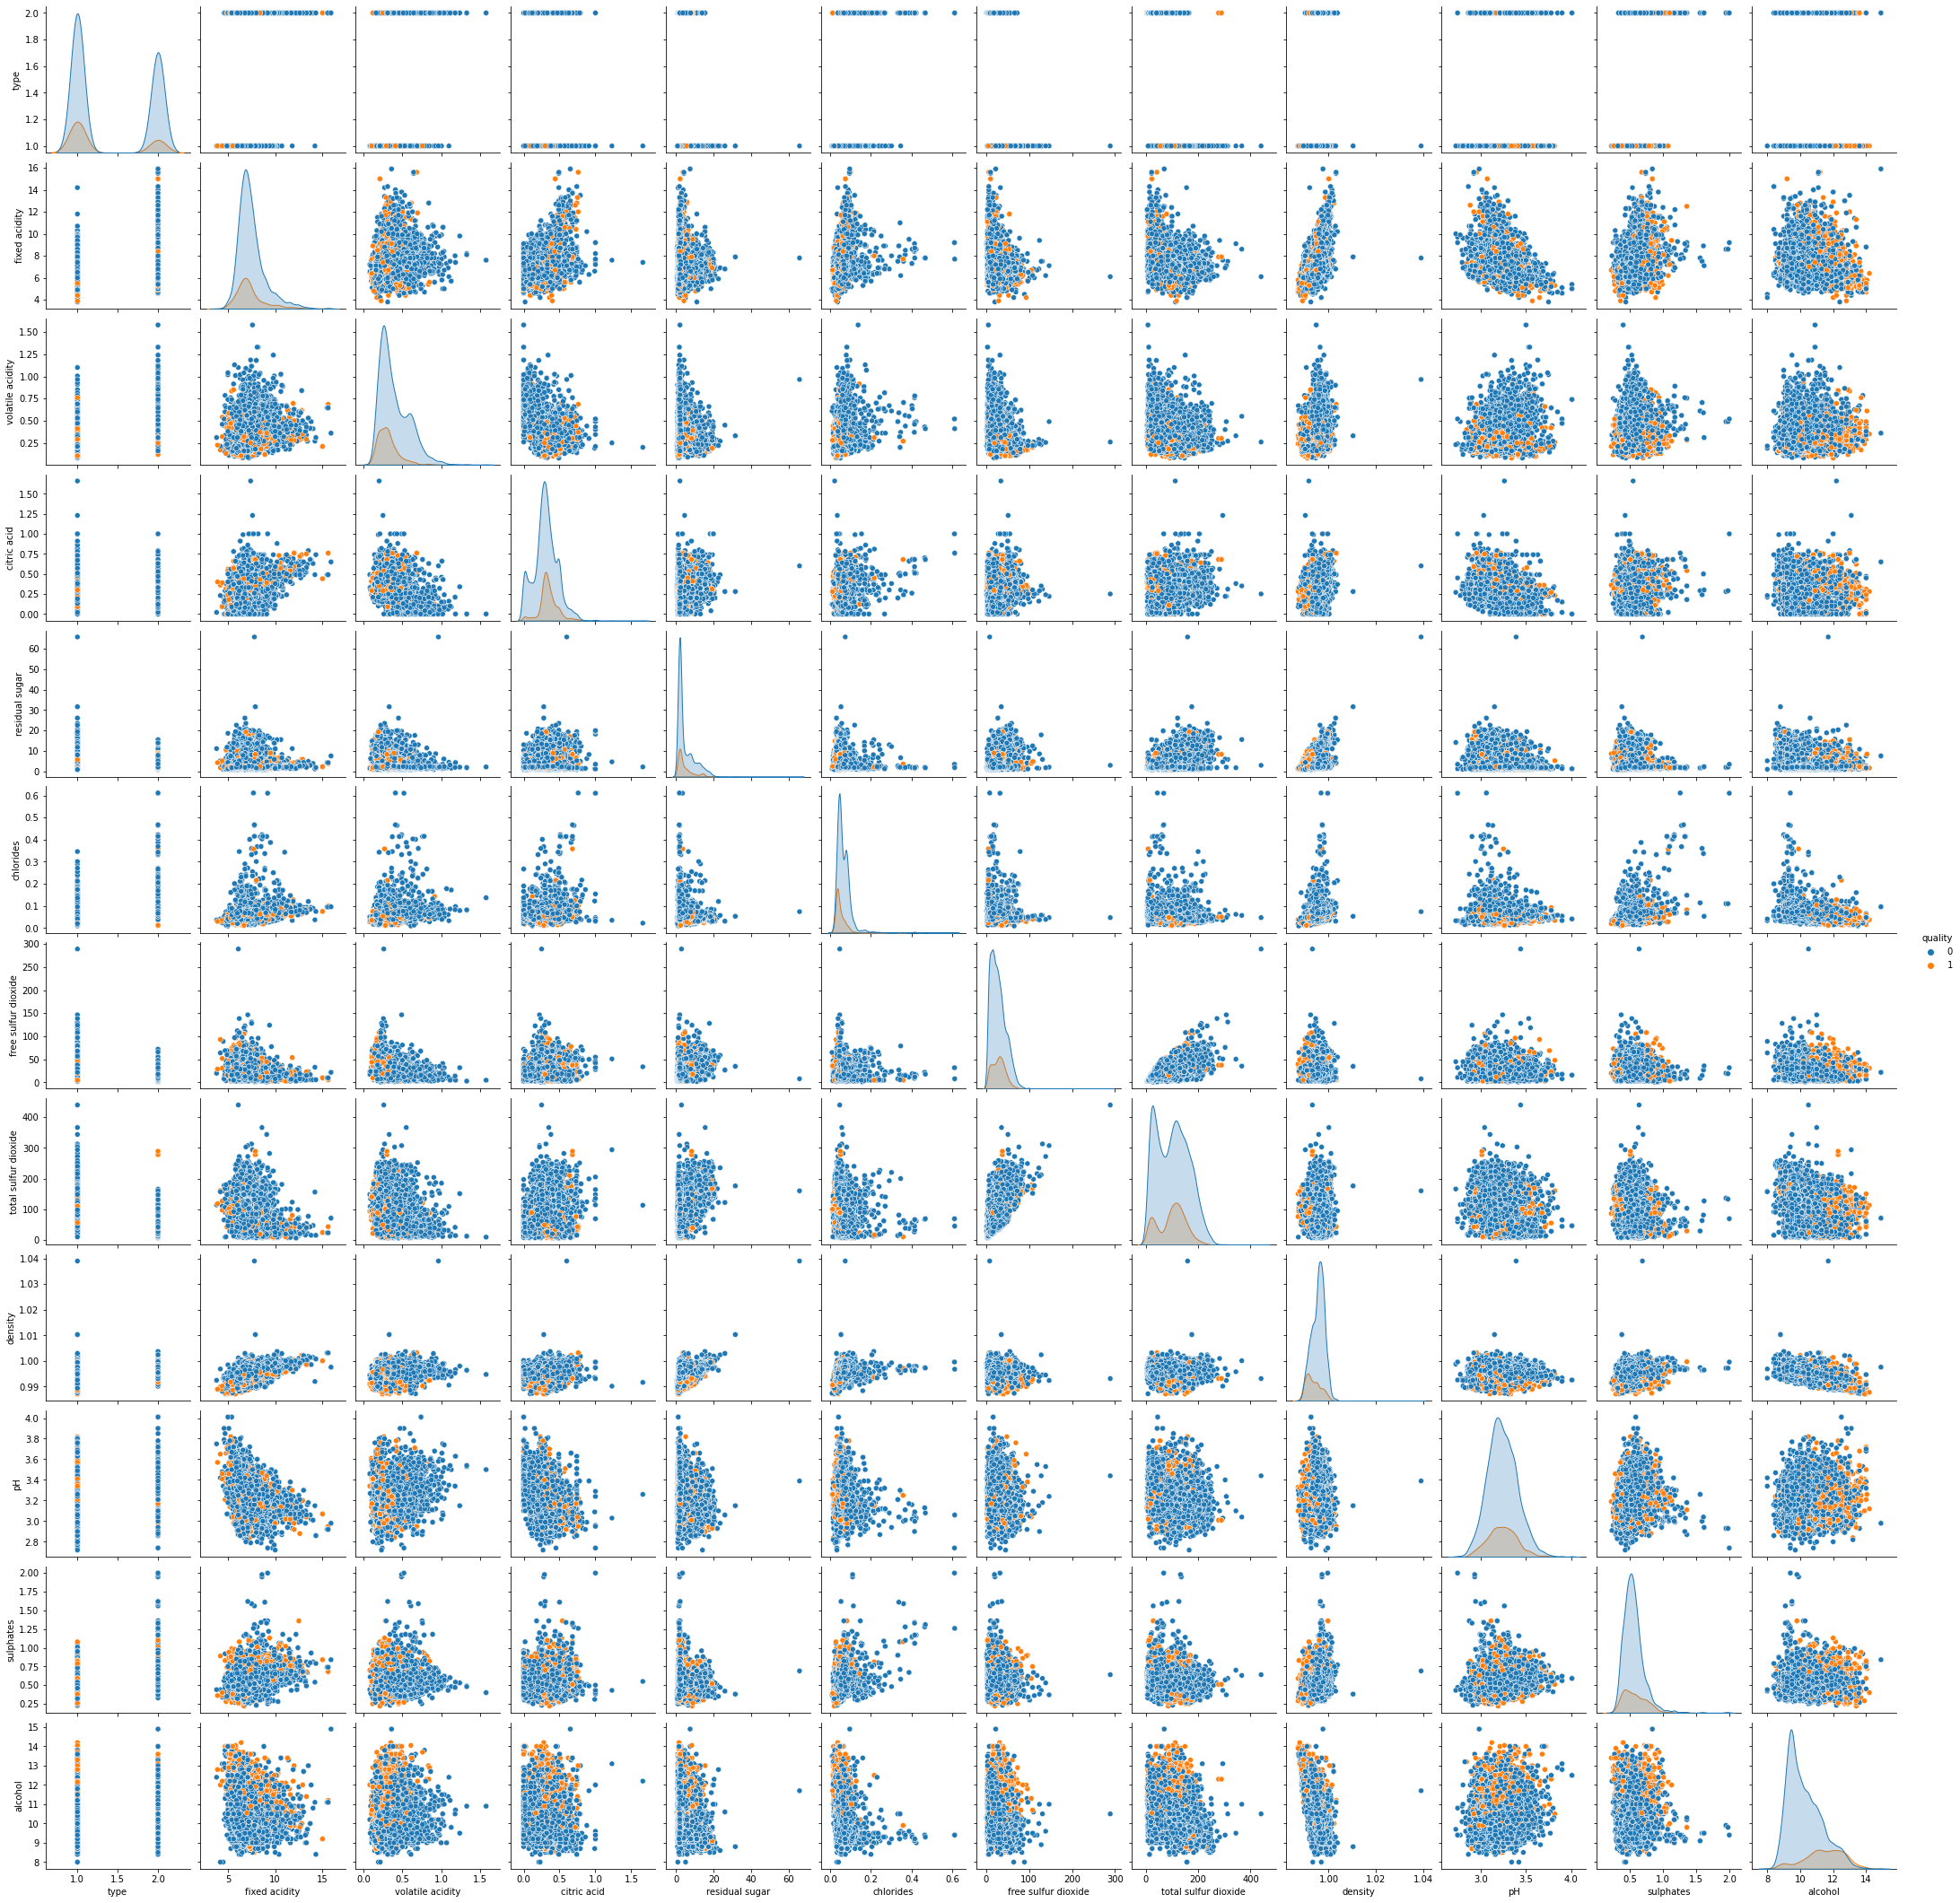

(None,)

In [ ]:
#pairplot
sns.pairplot(wine,  hue="quality") 
plt.show(), 

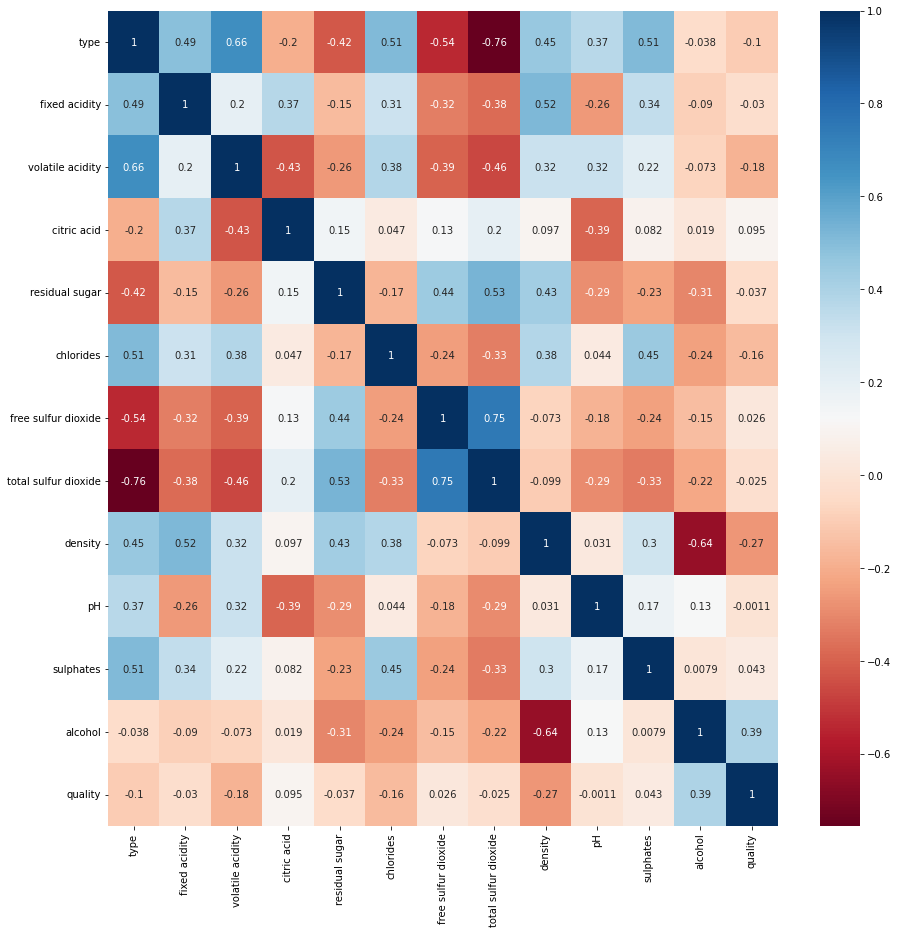

In [ ]:
## Correlation Matrix
plt.figure(figsize=(15,15))
sns.heatmap(wine.corr(), annot=True,cmap='RdBu')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


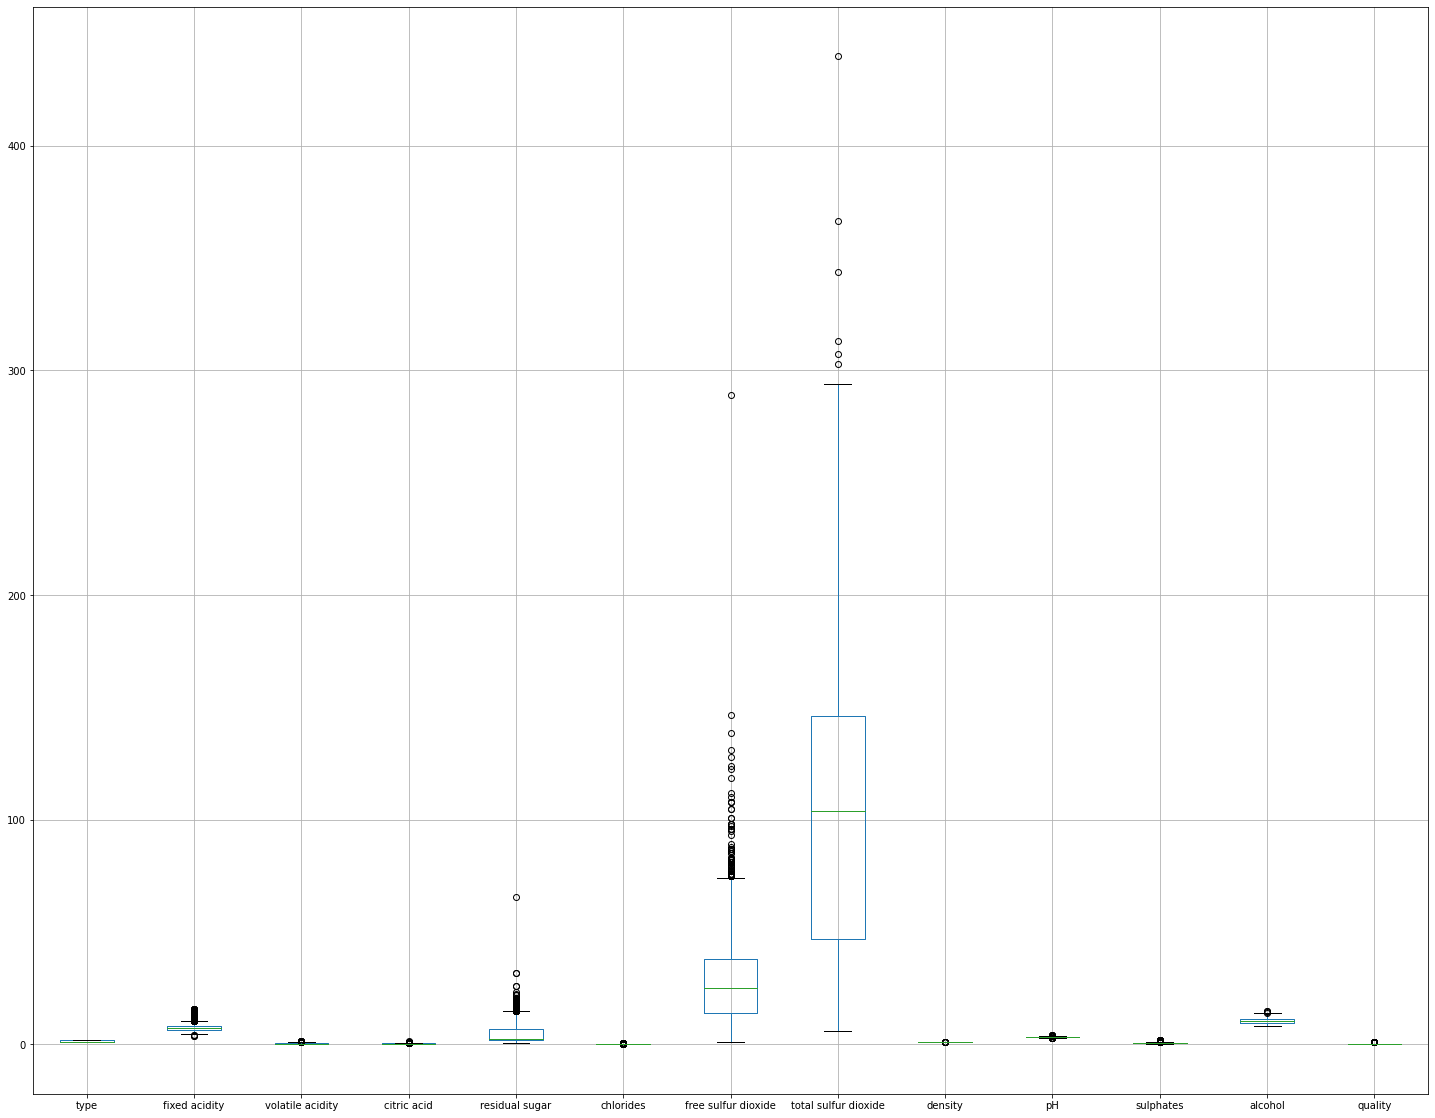

In [ ]:
## Check the outlier
plt.figure(figsize=(25,20))
numeric_col = ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
               'sulphates', 'alcohol', 'quality']
wine.boxplot(numeric_col)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

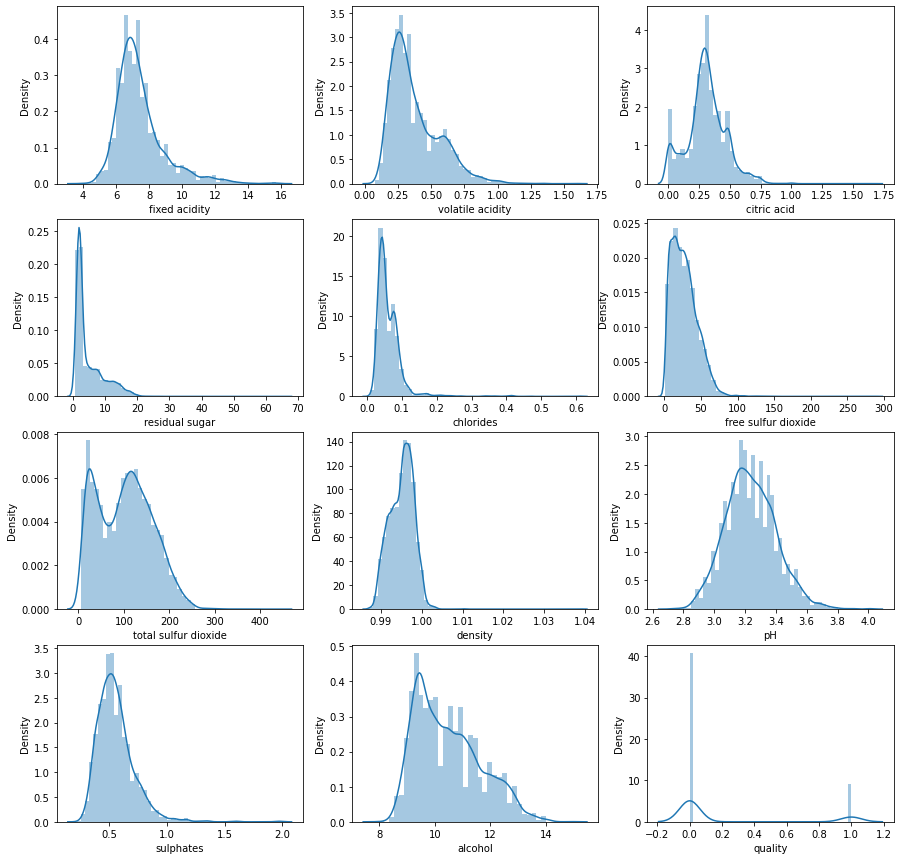

In [ ]:
## Show data distribution
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
sns.distplot(wine['fixed acidity'])
plt.subplot(4,3,2)
sns.distplot(wine['volatile acidity'])
plt.subplot(4,3,3)
sns.distplot(wine['citric acid'])
plt.subplot(4,3,4)
sns.distplot(wine['residual sugar'])
plt.subplot(4,3,5)
sns.distplot(wine['chlorides'])
plt.subplot(4,3,6)
sns.distplot(wine['free sulfur dioxide'])
plt.subplot(4,3,7)
sns.distplot(wine['total sulfur dioxide'])
plt.subplot(4,3,8)
sns.distplot(wine['density'])
plt.subplot(4,3,9)
sns.distplot(wine['pH'])
plt.subplot(4,3,10)
sns.distplot(wine['sulphates'])
plt.subplot(4,3,11)
sns.distplot(wine['alcohol'])  
plt.subplot(4,3,12)
sns.distplot(wine['quality'])      

## Evaluate Data

1. Create X and y to make a prediction

In [ ]:
X = wine.drop(columns=['quality'])
y = wine['quality']

In [ ]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
8091,2,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
8092,2,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
8093,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
8094,2,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8091    0
8092    0
8093    0
8094    0
8095    0
Name: quality, Length: 8062, dtype: int64

2. Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[-0.8095934 , -0.29795824, -0.5823124 , ..., -1.44663422,
        -0.65905247, -1.43606374],
       [-0.8095934 , -0.7760027 , -0.41892905, ...,  0.38660542,
        -0.41114481, -0.83733782],
       [-0.8095934 ,  0.4532545 , -0.52785128, ...,  0.14217347,
        -0.72102939, -0.32414419],
       ...,
       [ 1.23518793, -0.7760027 ,  0.72475435, ...,  1.11990128,
         1.20025501,  0.44564627],
       [ 1.23518793, -1.04917097,  1.4599794 , ...,  2.0365211 ,
         0.95234735, -0.23861191],
       [ 1.23518793, -0.98087891, -0.36446794, ...,  0.93657732,
         0.64246277,  0.44564627]])

3. Spilt into Train, Test data (8:2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 1000)

# Method

## Random Forest

F1 score = 0.93

Train model

In [ ]:
X_RF = wine.drop(columns=['quality'])

In [ ]:
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X, y, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 1000)

In [ ]:
model = RandomForestClassifier()
model = model.fit(X_trainRF,y_trainRF)
y_predRF = model.predict(X_testRF)
y_pred_trainRF = model.predict(X_trainRF)

In [ ]:
print(classification_report(y_testRF, y_predRF))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1311
           1       0.91      0.70      0.79       302

    accuracy                           0.93      1613
   macro avg       0.92      0.84      0.87      1613
weighted avg       0.93      0.93      0.93      1613



In [ ]:
#print test and train accuracy
print('acc train: ')
print(accuracy_score(y_trainRF, y_pred_trainRF))
print('acc test: ')
print(accuracy_score(y_testRF, y_predRF))

acc train: 
1.0
acc test: 
0.930564166150031


In [ ]:
#print defferent of test and train accuracy
print('differences: ')
RF_train = accuracy_score(y_trainRF, y_pred_trainRF)
RF_test = accuracy_score(y_testRF, y_predRF)
diff = RF_train-RF_test
print(diff)

differences: 
0.06943583384996899


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


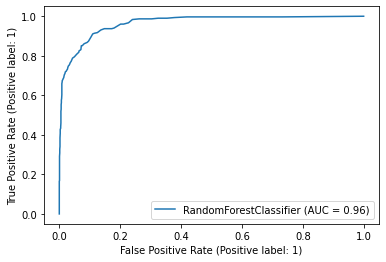

In [ ]:
metrics.plot_roc_curve(model, X_testRF, y_testRF)

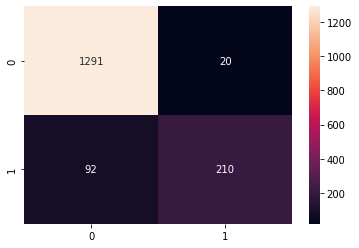

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testRF,y_predRF)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
# test with cross validation
from sklearn.model_selection import cross_val_score
accuracies_RF = cross_val_score(estimator = model, X = X_trainRF,
                             y = y_trainRF, cv = 10, scoring = 'roc_auc')


#we can see model's average accuracy
print('Mean accuracy: {:.4f}'.format(accuracies_RF.mean()))
#here is the model's standart deviation
print('Standard deviation: {:.4f}'.format(accuracies_RF.std()))

Mean accuracy: 0.9473
Standard deviation: 0.0137


Find best parameter

In [ ]:
rfc = RandomForestClassifier()
#determine the parameter
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,64,128,256,512,1024,2056,None]
}

In [ ]:
#find the best parameter for best accuracy
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X,y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024,
                                       2056, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [ ]:
#make a function for show all accuracy that parameter can be
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
#show all accuracy and parameter
display(cv)

Best parameters are: {'max_depth': 128, 'n_estimators': 250}


0.818 + or -0.005 for the {'max_depth': 2, 'n_estimators': 5}
0.815 + or -0.0 for the {'max_depth': 2, 'n_estimators': 10}
0.815 + or -0.0 for the {'max_depth': 2, 'n_estimators': 50}
0.815 + or -0.0 for the {'max_depth': 2, 'n_estimators': 100}
0.815 + or -0.0 for the {'max_depth': 2, 'n_estimators': 250}
0.818 + or -0.008 for the {'max_depth': 4, 'n_estimators': 5}
0.818 + or -0.01 for the {'max_depth': 4, 'n_estimators': 10}
0.82 + or -0.003 for the {'max_depth': 4, 'n_estimators': 50}
0.82 + or -0.005 for the {'max_depth': 4, 'n_estimators': 100}
0.821 + or -0.008 for the {'max_depth': 4, 'n_estimators': 250}
0.828 + or -0.027 for the {'max_depth': 8, 'n_estimators': 5}
0.836 + or -0.033 for the {'max_depth': 8, 'n_estimators': 10}
0.839 + or -0.024 for the {'max_depth': 8, 'n_estimators': 50}
0.839 + or -0.025 for the {'max_depth': 8, 'n_estimators': 100}
0.839 + or -0.024 for the {'max_depth': 8, 'n_estimators': 250}


In [ ]:
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X, y, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth =128, n_estimators = 250)
model = model.fit(X_trainRF,y_trainRF)
y_predRF = model.predict(X_testRF)

Suitable results

In [ ]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1311
           1       0.92      0.69      0.79       302

    accuracy                           0.93      1613
   macro avg       0.92      0.84      0.87      1613
weighted avg       0.93      0.93      0.93      1613



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_testRF,y_predRF)
y_pred_trainRF = model.predict(X_trainRF)

In [ ]:
#print test and train accuracy
print('acc train: ')
print(accuracy_score(y_trainRF, y_pred_trainRF))
print('acc test: ')
print(accuracy_score(y_testRF, y_predRF))

acc train: 
1.0
acc test: 
0.930564166150031


In [ ]:
#print defferent of test and train accuracy
print('differences: ')
RF_train = accuracy_score(y_trainRF, y_pred_trainRF)
RF_test = accuracy_score(y_testRF, y_predRF)
diff = RF_train-RF_test
print(diff)

differences: 
0.06943583384996899


In [ ]:
# test with cross validation
from sklearn.model_selection import cross_val_score
accuracies_RF = cross_val_score(estimator = model, X = X_trainRF,
                             y = y_trainRF, cv = 10,scoring = 'roc_auc')


#we can see model's average accuracy
print('Mean accuracy: {:.4f}'.format(accuracies_RF.mean()))
#here is the model's standart deviation
print('Standard deviation: {:.4f}'.format(accuracies_RF.std()))

Mean accuracy: 0.9476
Standard deviation: 0.0141


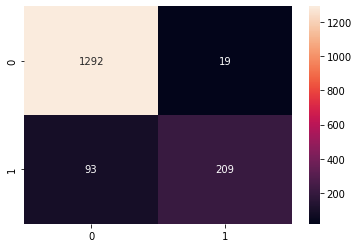

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testRF,y_predRF)
sns.heatmap(cm,annot=True,fmt='2.0f')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


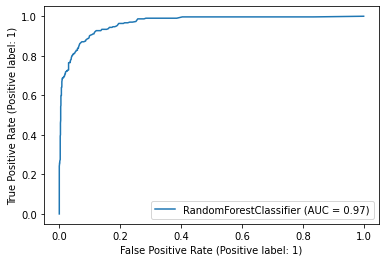

In [ ]:
metrics.plot_roc_curve(model, X_testRF, y_testRF)

In [ ]:
Rand_Best = model

## KNN
F1 score = 0.91

In [ ]:
X = wine.drop(['quality'], axis = 1)
y = wine['quality']

In [ ]:
#split data for train and test
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.2,
                                                   random_state = 1000)

In [ ]:
#find best k value by manual
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_trainKNN, y_trainKNN)
    
    y_pred_train = pipe_knn.predict(X_trainKNN)
    training_accuracy.append(accuracy_score(y_trainKNN, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_testKNN)
    acc_score = accuracy_score(y_testKNN,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.8871667699938004 Best K-Score 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

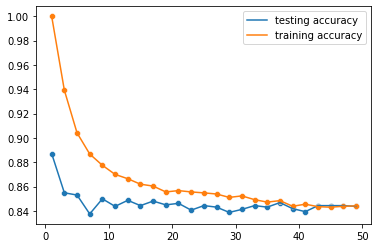

In [ ]:
#graph show accuracy from each k value
sns.lineplot(k, testing_accuracy)
sns.scatterplot(k, testing_accuracy)

sns.lineplot(k, training_accuracy)
sns.scatterplot(k, training_accuracy)
plt.legend(['testing accuracy', 'training accuracy'])

In [ ]:
#Fit a model with best K value
knn = KNeighborsClassifier(n_neighbors = 1)
pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
knnmodel = pipe_knn.fit(X_trainKNN, y_trainKNN)

In [ ]:
y_predKNN = knnmodel.predict(X_testKNN)
y_pred_trainKNN = knnmodel.predict(X_trainKNN)

In [ ]:
print('acc train: ')
print(accuracy_score(y_trainKNN, y_pred_trainKNN))
print('acc test: ')
print(accuracy_score(y_testKNN, y_predKNN))

acc train: 
1.0
acc test: 
0.8871667699938004


In [ ]:
print('differences: ')
KNN_train = accuracy_score(y_trainKNN, y_pred_trainKNN)
KNN_test = accuracy_score(y_testKNN, y_predKNN)
diff = KNN_train-KNN_test
print(diff)

differences: 
0.1128332300061996


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


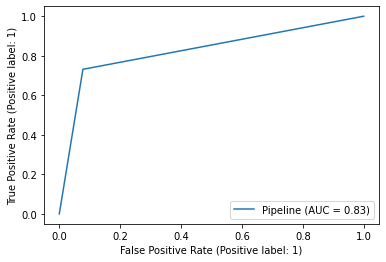

In [ ]:
#Auc roc curve
plot_roc_curve(pipe_knn, X_testKNN, y_testKNN)

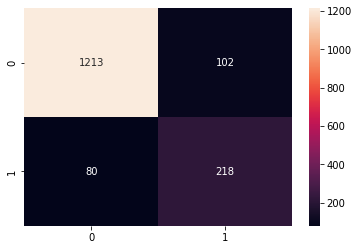

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testKNN,y_predKNN)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
estimator = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])

In [ ]:
#manual model
estimator.fit(X_trainKNN, y_trainKNN)
y_pred_estimator = estimator.predict(X_testKNN)
print(classification_report(y_testKNN, y_pred_estimator))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1315
           1       0.62      0.55      0.58       298

    accuracy                           0.85      1613
   macro avg       0.76      0.74      0.75      1613
weighted avg       0.85      0.85      0.85      1613



In [ ]:
#Find mean accuracy and stardard deviation score
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_trainKNN, y_trainKNN, cv = skfold, scoring = metric)
    return model_cv

pipe_knn_cv = model_evaluation(pipe_knn, 'roc_auc')

score_mean = [pipe_knn_cv.mean()]
score_std = [pipe_knn_cv.std()]
score_roc_auc = [roc_auc_score(y_testKNN, pipe_knn.predict(X_testKNN))]
method_name = ['K-Neighbors Classifier']

summary = pd.DataFrame({'method': method_name, 'mean score': score_mean,
                        'std score': score_std})
summary

,method,mean score,std score
0,K-Neighbors Classifier,0.811914,0.014779


In [ ]:
#Use gridserchcv for find hyperparameter
knn = KNeighborsClassifier(n_neighbors = 3)
estimator = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])

hyperparam_space = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'knn__leaf_size': [10, 20, 30, 40, 50],
    'knn__weights': ['uniform', 'distance']
}

grid = GridSearchCV(
                estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'roc_auc',
                n_jobs = -1)

grid.fit(X_trainKNN, y_trainKNN)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             n_jobs=-1,
             param_grid={'knn__leaf_size': [10, 20, 30, 40, 50],
                         'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [ ]:
#Show best parameter
print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.9365869002287923
best param {'knn__leaf_size': 10, 'knn__n_neighbors': 17, 'knn__weights': 'distance'}


In [ ]:
#Tune model by hyperparameter
KNN2 = grid.best_estimator_.fit(X_trainKNN, y_trainKNN)
y_pred_grid = grid.best_estimator_.predict(X_testKNN)
print(classification_report(y_testKNN, y_pred_grid))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1315
           1       0.78      0.71      0.74       298

    accuracy                           0.91      1613
   macro avg       0.86      0.83      0.84      1613
weighted avg       0.91      0.91      0.91      1613



In [ ]:
y_predKNN = KNN2.predict(X_testKNN)
y_pred_trainKNN = KNN2.predict(X_trainKNN)

In [ ]:
print('acc train: ')
print(accuracy_score(y_trainKNN, y_pred_trainKNN))
print('acc test: ')
print(accuracy_score(y_testKNN, y_predKNN))

acc train: 
1.0
acc test: 
0.9088654680719157


In [ ]:
print('differences: ')
KNN_train = accuracy_score(y_trainKNN, y_pred_trainKNN)
KNN_test = accuracy_score(y_testKNN, y_predKNN)
diff = KNN_train-KNN_test
print(diff)

differences: 
0.0911345319280843


In [ ]:
# test with cross validation for tune model
knn2_cv = model_evaluation(KNN2, 'roc_auc')
score2_mean = [knn2_cv.mean()]
score2_std = [knn2_cv.std()]

score_roc_auc = [roc_auc_score(y_testKNN,grid.best_estimator_.predict(X_testKNN))]
method2_name = ['K-Neighbors Classifier After Tuning']

summary = pd.DataFrame({'method': method2_name, 'mean score': score2_mean,
                        'std score': score2_std})
summary

#we can see model's average accuracy and model's standart deviation

,method,mean score,std score
0,K-Neighbors Classifier After Tuning,0.936587,0.010955


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


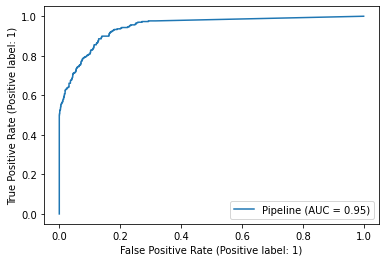

In [ ]:
plot_roc_curve(KNN2, X_testKNN, y_testKNN)

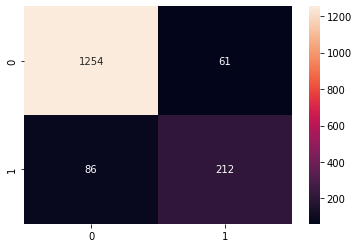

In [ ]:
#confusion matrix of the prediction
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testKNN, y_pred_grid)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
# compare acurracy between manual tune and hyperparameter tune
score_list = [roc_auc_score(y_testKNN, y_pred_estimator), roc_auc_score(y_testKNN, y_pred_grid)]
accuracy = [score, accuracy_score(y_testKNN, y_pred_grid)]
method_name = ['K-Neighbors Classifier Before Tuning', 'K-Neighbors Classifier After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'roc auc score': score_list,
    'accuracy score': accuracy
})
best_summary

,method,roc auc score,accuracy score
0,K-Neighbors Classifier Before Tuning,0.735847,0.887167
1,K-Neighbors Classifier After Tuning,0.832511,0.908865


## SVM

F1 score = 0.92

create svm 

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1311
           1       0.70      0.26      0.38       302

    accuracy                           0.84      1613
   macro avg       0.78      0.62      0.64      1613
weighted avg       0.82      0.84      0.81      1613



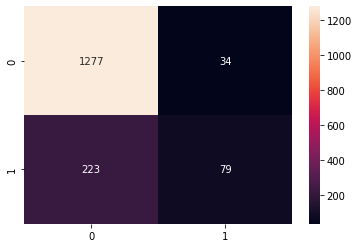

In [ ]:
## Check the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
y_pre_trainSVM = classifier.predict(X_train)
print('acc train: ')
print(accuracy_score(y_train, y_pre_trainSVM))
print('acc test: ')
print(accuracy_score(y_test, y_pred))

acc train: 
0.8539308419910063
acc test: 
0.8406695598264105


In [ ]:
print('differences: ')
SVMpre_train = accuracy_score(y_train, y_pre_trainSVM)
SVMpre_test = accuracy_score(y_test, y_pred)
diff = SVMpre_train - SVMpre_test
print(diff)

differences: 
0.013261282164595878


In [ ]:
## Check by using Cross_validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train,
                             y = y_train, cv = 10, scoring='roc_auc')
#we can see model's average accuracy
print('Mean accuracy: {:.2f}'.format(accuracies.mean()))

#here is the model's standart deviation
print('Standard deviation: {:.2f}'.format(accuracies.std()))

Mean accuracy: 0.85
Standard deviation: 0.02


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


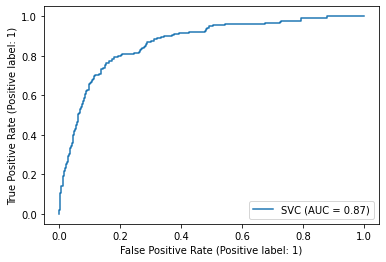

In [ ]:
plot_roc_curve(classifier, X_test, y_test)

Find most suitable

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# define parameter
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting frid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.816 total time=   1.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.816 total time=   1.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.819 total time=   1.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.818 total time=   1.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.818 total time=   1.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.819 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.823 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=   0.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.825 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.816 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

print(grid.best_score_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)
0.8978129792339473


Create New model to enhance accuracy

In [ ]:
SVM2 = SVC( C=100, kernel = 'rbf', random_state = 0, gamma = 1)
SVM2.fit(X_train, y_train)

# Check wirh test data
y_pred2 = SVM2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1311
           1       0.84      0.72      0.78       302

    accuracy                           0.92      1613
   macro avg       0.89      0.84      0.86      1613
weighted avg       0.92      0.92      0.92      1613



Show result

In [ ]:
# test with cross validation
from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = SVM2, X = X_train,
                             y = y_train, cv = 10, scoring='roc_auc')


#we can see model's average accuracy
print('Mean accuracy: {:.4f}'.format(accuracies2.mean()))
#here is the model's standart deviation
print('Standard deviation: {:.4f}'.format(accuracies2.std()))

Mean accuracy: 0.8963
Standard deviation: 0.0157


In [ ]:
y_pred2 = SVM2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1311
           1       0.84      0.72      0.78       302

    accuracy                           0.92      1613
   macro avg       0.89      0.84      0.86      1613
weighted avg       0.92      0.92      0.92      1613



In [ ]:
y_pre_trainSVM2 = SVM2.predict(X_train)
print('acc train: ')
print(accuracy_score(y_train, y_pre_trainSVM2))
print('acc test: ')
print(accuracy_score(y_test, y_pred))

acc train: 
1.0
acc test: 
0.8406695598264105


In [ ]:
print('differences: ')
SVMpre_train = accuracy_score(y_train, y_pre_trainSVM2)
SVMpre_test = accuracy_score(y_test, y_pred2)
diff = SVMpre_train - SVMpre_test
print(diff)

differences: 
0.07811531308121511


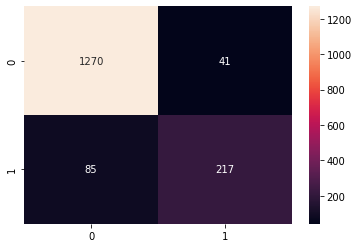

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm,annot=True,fmt='2.0f')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


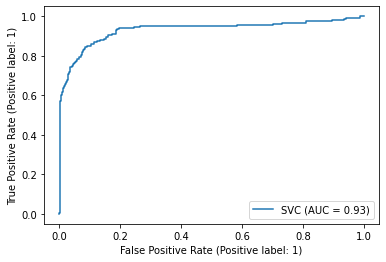

In [ ]:
plot_roc_curve(SVM2, X_test, y_test)

## Decision tree
F1 score = 0.91

Create decision tree

In [ ]:
X_DT = wine.drop(columns=['quality'])

In [ ]:
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X_DT,y,
                                                   train_size = 0.8,
                                                   test_size = 0.2,
                                                   random_state = 1000)

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(X_trainDT,y_trainDT)
y_predDT = model.predict(X_testDT)

In [ ]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1311
           1       0.73      0.73      0.73       302

    accuracy                           0.90      1613
   macro avg       0.84      0.83      0.83      1613
weighted avg       0.90      0.90      0.90      1613



In [ ]:
y_pre_trainDT = model.predict(X_trainDT)
#print the acuuracy of test and trian
print('acc train: ')
print(accuracy_score(y_trainDT, y_pre_trainDT))
print('acc test: ')
print(accuracy_score(y_testDT, y_predDT))

acc train: 
1.0
acc test: 
0.8995660260384377


In [ ]:
#print the defferent of test and train accuracy
print('differences: ')
DTpre_train = accuracy_score(y_trainDT, y_pre_trainDT)
DTpre_test = accuracy_score(y_testDT, y_predDT)
diff = DTpre_train - DTpre_test
print(diff)

differences: 
0.10043397396156228


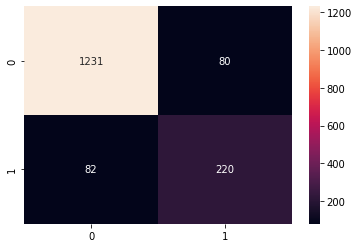

In [ ]:
cm = confusion_matrix(y_test,y_predDT)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
# test with cross validation
from sklearn.model_selection import cross_val_score
accuracies_DT = cross_val_score(estimator = model, X = X_trainDT,
                             y = y_trainDT, cv = 10,scoring='roc_auc')


#we can see model's average accuracy
print('Mean accuracy: {:.4f}'.format(accuracies_DT.mean()))
#here is the model's standart deviation
print('Standard deviation: {:.4f}'.format(accuracies_DT.std()))

Mean accuracy: 0.8083
Standard deviation: 0.0219


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


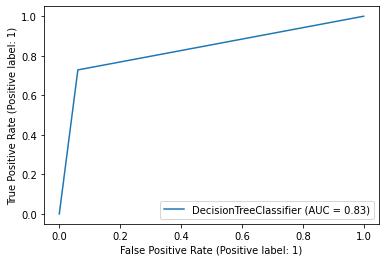

In [ ]:
metrics.plot_roc_curve(model, X_testDT, y_testDT)

Find most suitable

In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [ ]:
#determine the lenght of parameter
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,8,16,32,64,128,256,512,1024,2048]
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [ ]:
#find the best parameter
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 8, 16, 32, 64, 128, 256,
                                                 512, 1024, 2048],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12]})

In [ ]:
#print the best parameter
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 16
Best Number Of Components: 11

DecisionTreeClassifier(max_depth=16)


Create model

In [ ]:
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X,y,
                                                   train_size = 0.8,
                                                   test_size = 0.2,
                                                   random_state = 1000)

In [ ]:
model = DecisionTreeClassifier(max_depth=16)
model = model.fit(X_trainDT,y_trainDT)
y_predDT2 = model.predict(X_testDT)
y_predDT_Train2 = model.predict(X_trainDT)

In [ ]:
print(classification_report(y_testDT, y_predDT2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1311
           1       0.74      0.72      0.73       302

    accuracy                           0.90      1613
   macro avg       0.84      0.83      0.84      1613
weighted avg       0.90      0.90      0.90      1613



In [ ]:

#print test and train accuracy
print('acc train: ')
print(accuracy_score(y_trainDT, y_predDT_Train2))
print('acc test: ')
print(accuracy_score(y_testDT, y_predDT2))

acc train: 
0.9917816715769887
acc test: 
0.9014259144451333


In [ ]:
#print the different of test and train accuracy
print('differences: ')
DTpre_train2 = accuracy_score(y_trainDT, y_predDT_Train2)
DTpre_test2 = accuracy_score(y_testDT, y_predDT2)
diff = DTpre_train2 - DTpre_test2
print(diff)

differences: 
0.0903557571318554


In [ ]:
accuracy_score(y_testDT,y_predDT)

0.8995660260384377

In [ ]:
# test with cross validation
from sklearn.model_selection import cross_val_score
accuracies_DT = cross_val_score(estimator = model, X = X_trainDT,
                             y = y_trainDT, cv = 10, scoring='roc_auc')


#we can see model's average accuracy
print('Mean accuracy: {:.4f}'.format(accuracies_DT.mean()))
#here is the model's standart deviation
print('Standard deviation: {:.4f}'.format(accuracies_DT.std()))

Mean accuracy: 0.8131
Standard deviation: 0.0215


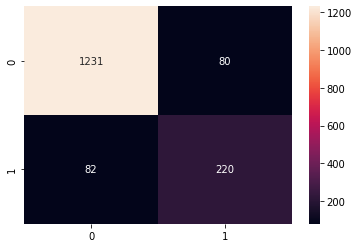

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testDT,y_predDT)
sns.heatmap(cm,annot=True,fmt='2.0f')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


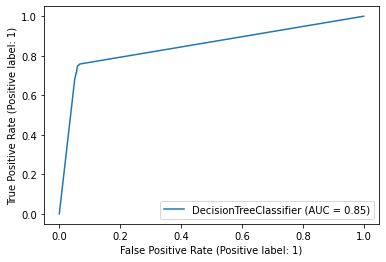

In [ ]:
metrics.plot_roc_curve(model, X_testDT, y_testDT)

## Logistic Regression
F1 score = 0.83

Try create and fit model

In [ ]:
reg_method = LogisticRegression() 
reg_method.fit(X_train,y_train) 

reg_pred = reg_method.predict(X_test)
print(classification_report(y_test, reg_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1311
           1       0.61      0.26      0.37       302

    accuracy                           0.83      1613
   macro avg       0.73      0.61      0.63      1613
weighted avg       0.80      0.83      0.80      1613



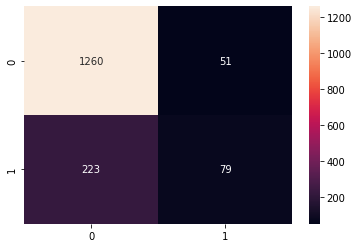

In [ ]:
## Check the confusion matrix
from sklearn.metrics import confusion_matrix
cm_reg = confusion_matrix(y_test, reg_pred)
sns.heatmap(cm_reg,annot=True,fmt='2.0f')

In [ ]:
y_pre_trainReg = reg_method.predict(X_train)
print('acc train: ')
print(accuracy_score(y_train, y_pre_trainReg))
print('acc test: ')
print(accuracy_score(y_test, reg_pred))

acc train: 
0.829741045123275
acc test: 
0.8301301921884687


In [ ]:
print('differences: ')
REGpre_train =accuracy_score(y_train, y_pre_trainReg)
REGpre_test = accuracy_score(y_test, reg_pred)
diff = REGpre_train - REGpre_test
print(diff)

differences: 
-0.0003891470651937734


In [ ]:
# test with cross validation
# Acc does not change
from sklearn.model_selection import cross_val_score
accuracies_log = cross_val_score(estimator = reg_method, X = X_train,
                             y = y_train, cv = 10, scoring='roc_auc')


#we can see model's average accuracy
print('Mean accuracy: {:.4f}'.format(accuracies_log.mean()))
#here is the model's standart deviation
print('Standard deviation: {:.4f}'.format(accuracies_log.std()))

Mean accuracy: 0.8209
Standard deviation: 0.0119


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


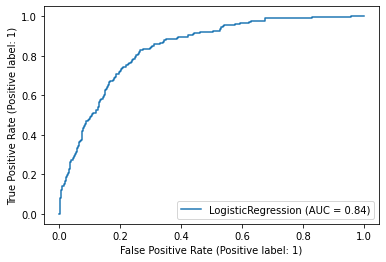

In [ ]:
metrics.plot_roc_curve(reg_method, X_test, y_test)

Find most suitable

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":['l2']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10, refit = True, verbose=3)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END ..............C=0.001, penalty=l2;, score=0.819 total time=   0.0s
[CV 2/10] END ..............C=0.001, penalty=l2;, score=0.816 total time=   0.0s
[CV 3/10] END ..............C=0.001, penalty=l2;, score=0.819 total time=   0.0s
[CV 4/10] END ..............C=0.001, penalty=l2;, score=0.814 total time=   0.0s
[CV 5/10] END ..............C=0.001, penalty=l2;, score=0.816 total time=   0.0s
[CV 6/10] END ..............C=0.001, penalty=l2;, score=0.814 total time=   0.0s
[CV 7/10] END ..............C=0.001, penalty=l2;, score=0.817 total time=   0.0s
[CV 8/10] END ..............C=0.001, penalty=l2;, score=0.814 total time=   0.0s
[CV 9/10] END ..............C=0.001, penalty=l2;, score=0.814 total time=   0.0s
[CV 10/10] END .............C=0.001, penalty=l2;, score=0.818 total time=   0.0s
[CV 1/10] END ...............C=0.01, penalty=l2;, score=0.850 total time=   0.0s
[CV 2/10] END ...............C=0.01, penalty=l2;

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8300498338870433


Create model

In [ ]:
logis = logreg_cv.best_estimator_.fit(X_train, y_train)
y_pred_grid = logreg_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1311
           1       0.65      0.20      0.30       302

    accuracy                           0.83      1613
   macro avg       0.75      0.59      0.60      1613
weighted avg       0.81      0.83      0.79      1613



In [ ]:
y_pre_trainReg2 = logis.predict(X_train)
print('acc train: ')
print(accuracy_score(y_train, y_pre_trainReg2))
print('acc test: ')
print(accuracy_score(y_test, y_pred_grid))

acc train: 
0.829896107923709
acc test: 
0.8301301921884687


In [ ]:
print('differences: ')
REGpre_train =accuracy_score(y_train, y_pre_trainReg2)
REGpre_test = accuracy_score(y_test, y_pred_grid)
diff = REGpre_train - REGpre_test
print(diff)

differences: 
-0.00023408426475968191


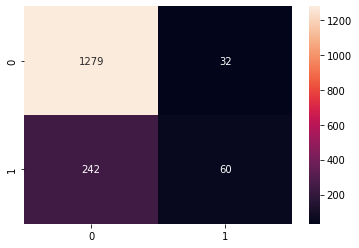

In [ ]:
## Check the confusion matrix
from sklearn.metrics import confusion_matrix
cm_reg2 = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(cm_reg2,annot=True,fmt='2.0f')

In [ ]:
# test with cross validation
# Acc does not change
from sklearn.model_selection import cross_val_score
accuracies_log = cross_val_score(estimator = logis, X = X_train,
                             y = y_train, cv = 10, scoring='roc_auc')


#we can see model's average accuracy
print('Mean accuracy: {:.4f}'.format(accuracies_log.mean()))
#here is the model's standart deviation
print('Standard deviation: {:.4f}'.format(accuracies_log.std()))

Mean accuracy: 0.8177
Standard deviation: 0.0135


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


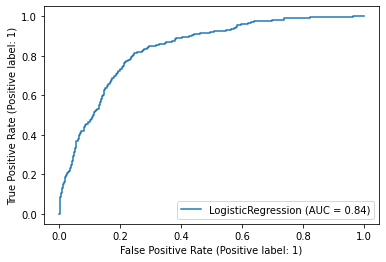

In [ ]:
plot_roc_curve(logis, X_test, y_test)

# Most Suitable = Random Forest
Experiment

In [ ]:
predicted_X1 = [[2, 8.1, 0.38, 0.28, 2.1, 0.066, 13,
                 30, 0.9968, 3.23, 0.73, 9.7]]
# y_predicted should = 1 (Real)
predicted_X2 = [[2, 7.3, 0.67, 0.26, 1.8, 0.401, 16, 
                51, 0.9969, 3.16, 1.14, 9.4]] 
# y_predicted should = 0 (Real)                       




In [ ]:
# randomForest Prediction

First_Exp = Rand_Best.predict(predicted_X1) 
Second_Exp = Rand_Best.predict(predicted_X2) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("Results 1: ")
print(First_Exp)
# 1 = Good
# Predict true

Results 1: 
[1]


In [ ]:
print("Results 2: ")
print(Second_Exp)
# 0 = Normal
# Predict true

Results 2: 
[0]
